In [1]:
import pandas as pd

# Baseline MLP Material Classification Experiment

In [2]:
# read data
PATH = "../../my_data/identification-dataset/my_custom_data/big-identification-dataset.csv"
df = pd.read_csv(PATH)

In [3]:
# drop uncomplete rows
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119744 entries, 0 to 159586
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tdoa           119744 non-null  float64
 1   snr_an         119744 non-null  float64
 2   power_dif      119744 non-null  float64
 3   rx_snr         119744 non-null  float64
 4   rx_powerdif    119744 non-null  float64
 5   tof            119744 non-null  float64
 6   material       119744 non-null  object 
 7   NLOS_material  119744 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.2+ MB


In [5]:
# Dropping rows containing 0 in the 'NLOS_material' column
df = df[df['NLOS_material'] != 0]

In [6]:
# show different label types
df.NLOS_material.unique()

array([1, 2, 3, 4, 5, 6])

In [7]:
# show the respective materials
df.material.unique()

array(['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet',
       'wooden-shelf'], dtype=object)

## Classification

In [8]:
# Import modules from Scikit-learn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split   # Import train_test_split function
from sklearn import metrics   # import metrics modules for accuracy calculation
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Create a pipeline object for the model
pipe_MLP = make_pipeline(StandardScaler(),
                         MLPClassifier(solver='adam',
                                       hidden_layer_sizes=(100,100,100,100),
                                       random_state=0,
                                       max_iter=500,           # TODO: tune it later
                                       verbose=True
                                       )
                        )

In [11]:
# Extracted features 
X = df[['tdoa', 'snr_an', 'power_dif', 'rx_snr', 'rx_powerdif', 'tof']]
y = df['NLOS_material'] # Labels

In [12]:
# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% training and 30% test

In [13]:
# Train the whole pipeline
pipe_MLP.fit(X_train, y_train)

Iteration 1, loss = 0.88043841
Iteration 2, loss = 0.66583046
Iteration 3, loss = 0.62502042
Iteration 4, loss = 0.60457548
Iteration 5, loss = 0.59666728
Iteration 6, loss = 0.58319932
Iteration 7, loss = 0.57478661
Iteration 8, loss = 0.57273428
Iteration 9, loss = 0.56922772
Iteration 10, loss = 0.56799267
Iteration 11, loss = 0.56261162
Iteration 12, loss = 0.55713803
Iteration 13, loss = 0.55815361
Iteration 14, loss = 0.55472260
Iteration 15, loss = 0.55160163
Iteration 16, loss = 0.54937572
Iteration 17, loss = 0.54809836
Iteration 18, loss = 0.54457660
Iteration 19, loss = 0.54434330
Iteration 20, loss = 0.54425690
Iteration 21, loss = 0.54188477
Iteration 22, loss = 0.54066449
Iteration 23, loss = 0.54118940
Iteration 24, loss = 0.53847795
Iteration 25, loss = 0.53451221
Iteration 26, loss = 0.53425397
Iteration 27, loss = 0.53414348
Iteration 28, loss = 0.53221953
Iteration 29, loss = 0.53328068
Iteration 30, loss = 0.53224251
Iteration 31, loss = 0.52983732
Iteration 32, los

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100),
                               max_iter=500, random_state=0, verbose=True))])

In [14]:
# Make predictions on the test data
y_pred = pipe_MLP.predict(X_test)

In [15]:
# Caluclate the accuracy on test data predicitons
print(f'Test Accuracy: {metrics.accuracy_score(y_test, y_pred) * 100}%')

Test Accuracy: 72.71461975281149%


In [16]:
print(f'Test Precision: {metrics.precision_score(y_test, y_pred, average="macro") * 100}%')

Test Precision: 72.63861764523364%


In [17]:
print(f'Test Recall: {metrics.recall_score(y_test, y_pred, average="macro") * 100}%')

Test Recall: 72.92136238250939%


In [18]:
print(f'Test F1: {metrics.f1_score(y_test, y_pred, average="macro" )}')

Test F1: 0.7267944373568165


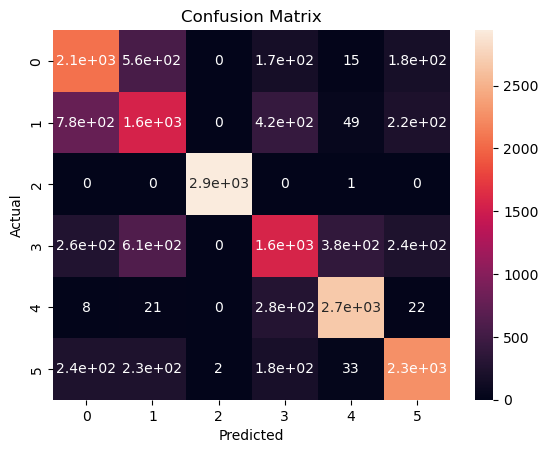

In [19]:
cm = confusion_matrix(y_test, y_pred)
# axis_labels = ['1', 'False']
plt.figure()
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()